In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
#生成2维正态分布，100个正样本
x1, y1 = make_gaussian_quantiles(mean=(1, 1), n_samples=100, n_features=2, n_classes=1)
#生成2维正态分布，200个负样本，2个样本特征均值都为3
x2, y2 = make_gaussian_quantiles(mean=(3, 3), n_samples=200, n_features=2, n_classes=1)

In [22]:
#将两组数据合成一组数据
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, y2+1))

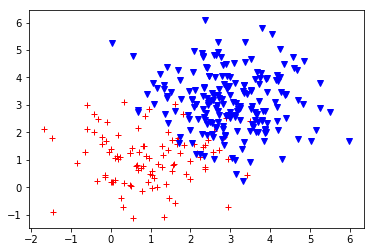

In [23]:
plt.figure()
mark = ['+r', 'vb']
for i in range(300):
    plt.plot(x_data[i,0], x_data[i,1], mark[y_data[i]])
plt.show()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5)

In [25]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_train, y_train)

/home/xzw/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

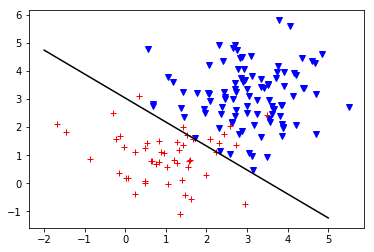

In [26]:
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x_train[i,0], x_train[i,1], mark[y_train[i]])
x_linear = np.array([[-2], [5]])
y_linear = (-logistic.intercept_-x_linear*logistic.coef_[0][0])/logistic.coef_[0][1]
plt.plot(x_linear, y_linear, 'k')
plt.show()

In [ ]:
'''
(2)采用主成分降维方法(PCA)对数据进行降维，降维后的维度为1
'''

In [27]:
#训练集PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
x = pca.transform(x_train)

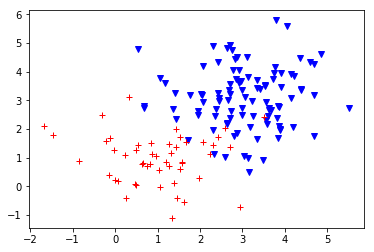

In [29]:
#PCA降维前训练集数据分布图
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x_train[i,0], x_train[i,1], mark[y_train[i]])
plt.show()

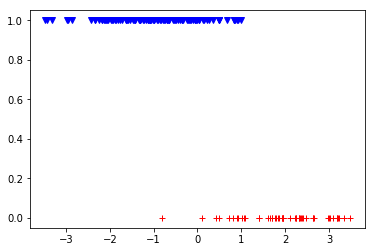

In [30]:
#PCA降维后训练集数据分布
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x[i], y_train[i], mark[y_train[i]])
plt.show()

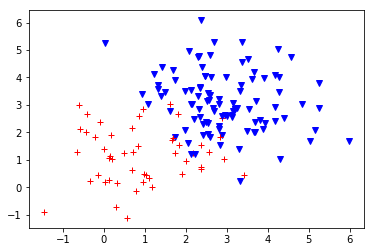

In [32]:
#PCA降维前测试集数据分布图
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x_test[i,0], x_test[i,1], mark[y_test[i]])
plt.show()

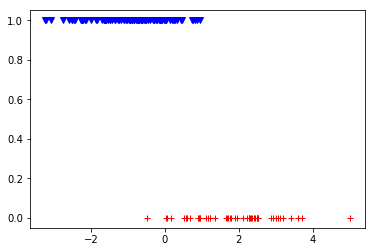

In [33]:
#测试集PCA降维
pca.fit(x_test)
x = pca.transform(x_test)
#PCA降维后测试集数据分布图
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x[i], y_test[i], mark[y_test[i]])
plt.show()

In [ ]:
'''
(3)采用线性判别分析方法(LDA)对数据进行降维，降维后的维度为1。
'''

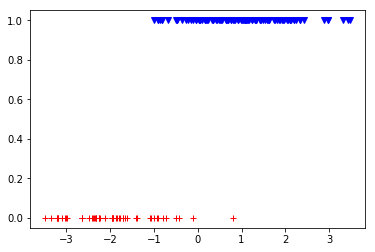

In [37]:
#LDA降维后训练集数据分布情况
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train, y_train)
x = lda.transform(x_train)
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x[i], y_train[i], mark[y_train[i]])
plt.show()

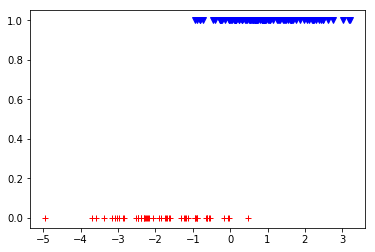

In [38]:
#LDA降维后测试集数据分布情况
lda.fit(x_test, y_test)
x = lda.transform(x_test)
plt.figure()
mark = ['+r', 'vb']
for i in range(150):
    plt.plot(x[i], y_test[i], mark[y_test[i]])
plt.show()

In [ ]:
'''
(4)对LDA降维后的数据，采用近邻分类器(KNN)对测试数据进行分类,k=1,3,5
'''

In [45]:
import operator
def knn(x_test, x_data, y_data, k):
    #计算样本数量
    x_data_size = x_data.shape[0]
    #复制x_test
    np.tile(x_test, (x_data_size,1))
    #计算x_test与每一个样本的差值
    diffMat = np.tile(x_test, (x_data_size,1)) - x_data
    #计算差值的平方
    sqDiffMat = diffMat**2
    #求和
    sqDistances = sqDiffMat.sum(axis=1)
    #开方
    distances = sqDistances**0.5
    #从小到大排序
    sortedDistances = distances.argsort()
    classCount = {}
    for i in range(k):
        #获取标签
        votelabel = y_data[sortedDistances[i]]
        #统计标签数量
        classCount[votelabel] = classCount.get(votelabel, 0) + 1
    #根据operator.itemgetter(1)-第1个值对 classCount排序，然后再取倒序
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    #获取数量最多的标签
    return sortedClassCount[0][0]

lda.fit(x_train, y_train)
x_lda = lda.transform(x_train)

predictions = []
for i in range(x_test.shape[0]):
    predictions.append(knn(x[i], x_lda, y_train, 1))
    
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        50
           1       0.92      0.96      0.94       100

   micro avg       0.92      0.92      0.92       150
   macro avg       0.92      0.90      0.91       150
weighted avg       0.92      0.92      0.92       150



In [41]:
predictions = []
for i in range(x_test.shape[0]):
    predictions.append(knn(x[i], x_lda, y_train, 3))
    
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87        50
           1       0.90      0.99      0.94       100

   micro avg       0.92      0.92      0.92       150
   macro avg       0.94      0.89      0.90       150
weighted avg       0.93      0.92      0.92       150



In [42]:
predictions = []
for i in range(x_test.shape[0]):
    predictions.append(knn(x[i], x_lda, y_train, 5))
    
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87        50
           1       0.90      0.99      0.94       100

   micro avg       0.92      0.92      0.92       150
   macro avg       0.94      0.89      0.90       150
weighted avg       0.93      0.92      0.92       150



In [ ]:
'''
(5)令近邻分类器(KNN)的K值为1，采用 95% 置信度下的 T-test 方法对 PCA 和 LDA 降维方法的分类结果进行假设检验
'''

In [47]:
LDA_predictions = []
for i in range(x_test.shape[0]):
    LDA_predictions.append(knn(x[i], x_lda, y_train, 1))

In [49]:
x_pca = pca.transform(x_train)
x = pca.transform(x_test)

In [50]:
PCA_predictions = []
for i in range(x_test.shape[0]):
    PCA_predictions.append(knn(x[i], x_pca, y_train, 1))

In [52]:
from scipy import stats
t,p=stats.ttest_rel(LDA_predictions ,PCA_predictions)

In [53]:
p

0.20696612629122194

In [54]:
t

1.2674655824500394